In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests

In [ ]:
url_train_image = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
train_image = "train-images-idx3-ubyte.gz"
# Téléchargez le fichier depuis le lien
response = requests.get(url_train_image)
with open(train_image, 'wb') as file:
    file.write(response.content)

url_train_label = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
train_label = "train-labels-idx1-ubyte.gz"
# Téléchargez le fichier depuis le lien
response = requests.get(url_train_label)
with open(train_label, 'wb') as file:
    file.write(response.content)

url_test_image = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
test_image = "t10k-images-idx3-ubyte.gz"
# Téléchargez le fichier depuis le lien
response = requests.get(url_test_image)
with open(test_image, 'wb') as file:
    file.write(response.content)

url_test_label = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
test_label = "t10k-labels-idx1-ubyte.gz"
# Téléchargez le fichier depuis le lien
response = requests.get(url_test_label)
with open(test_label, 'wb') as file:
    file.write(response.content)

In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

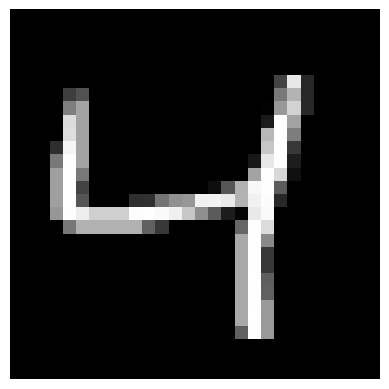

(60000, 28, 28)

In [ ]:
# Décompressez le fichier .gz et chargez les données
with gzip.open(train_image, 'rb') as file:
    binary_train_image = file.read()

# Les données MNIST commencent après les 16 premiers octets d'en-tête
# Le format MNIST est bien documenté, mais vous devrez peut-être ajuster
# ces valeurs en fonction du contenu spécifique du fichier
data_train_image = np.frombuffer(binary_train_image[16:], dtype=np.uint8)
data_train_image = data_train_image.reshape(-1, 28, 28)  # Les images MNIST sont de taille 28x28 pixels

# Affichez une image MNIST (par exemple, la première image)
plt.imshow(data_train_image[2], cmap='gray')
plt.axis('off')
plt.show()

data_train_image.shape


In [ ]:
# Charger les données d'étiquettes
with gzip.open(train_label, 'rb') as file:
    binary_train_label = file.read()
# Les données d'étiquettes MNIST commencent après les 8 premiers octets d'en-tête
train_labels = np.frombuffer(binary_train_label[8:], dtype=np.uint8)
index = 2  # Remplacez par l'indice de l'exemple que vous souhaitez afficher
print(f"Étiquette de l'exemple {index}: {train_labels[index]}")
train_labels.shape

Étiquette de l'exemple 2: 4


(60000,)

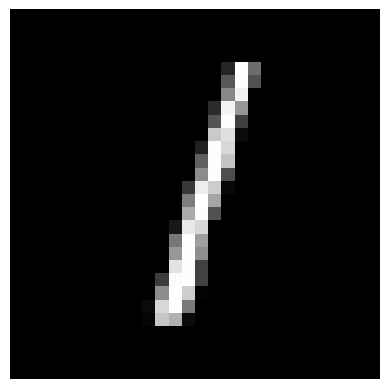

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
with gzip.open(test_image, 'rb') as file:
    binary_test_image = file.read()
data_test_image = np.frombuffer(binary_test_image[16:], dtype=np.uint8)
data_test_image = data_test_image.reshape(-1, 28, 28)
plt.imshow(data_test_image[2], cmap='gray')
plt.axis('off')
plt.show()
data_test_image

In [ ]:
# Charger les données d'étiquettes
with gzip.open(test_label, 'rb') as file:
    binary_test_label = file.read()
# Les données d'étiquettes MNIST commencent après les 8 premiers octets d'en-tête
test_labels = np.frombuffer(binary_test_label[8:], dtype=np.uint8)
index = 2  # Remplacez par l'indice de l'exemple que vous souhaitez afficher
print(f"Étiquette de l'exemple {index}: {test_labels[index]}")

Étiquette de l'exemple 2: 1


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Définir la transformation pour normaliser les images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Télécharger le jeu de données MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Créer des chargeurs de données pour l'entraînement et les tests
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 104424329.12it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31204454.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32917298.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16076395.58it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Ce code utilise un réseau de neurones convolutif simple avec deux couches de convolution suivies de couches de ReLU et de pooling, puis deux
# couches entièrement connectées. Il entraîne le modèle sur l'ensemble d'entraînement MNIST pendant un certain nombre d'époques et évalue la
# précision du modèle sur l'ensemble de test.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Définir l'architecture du réseau de neurones convolutif (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


In [ ]:
# Instancier le modèle, la fonction de coût et l'optimiseur
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
num_epochs = 5

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item()}')

# Évaluation du modèle sur l'ensemble de test
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Accuracy on the test set: {100 * accuracy:.2f}%')


Epoch 1/5, Batch 0/938, Loss: 2.3023040294647217
Epoch 1/5, Batch 100/938, Loss: 0.22820913791656494
Epoch 1/5, Batch 200/938, Loss: 0.2580619752407074
Epoch 1/5, Batch 300/938, Loss: 0.10118012875318527
Epoch 1/5, Batch 400/938, Loss: 0.09285466372966766
Epoch 1/5, Batch 500/938, Loss: 0.07604522258043289
Epoch 1/5, Batch 600/938, Loss: 0.0333879180252552
Epoch 1/5, Batch 700/938, Loss: 0.0854552611708641
Epoch 1/5, Batch 800/938, Loss: 0.02179553173482418
Epoch 1/5, Batch 900/938, Loss: 0.049387913197278976
Epoch 2/5, Batch 0/938, Loss: 0.059390727430582047
Epoch 2/5, Batch 100/938, Loss: 0.013276943005621433
Epoch 2/5, Batch 200/938, Loss: 0.044115107506513596
Epoch 2/5, Batch 300/938, Loss: 0.07214052230119705
Epoch 2/5, Batch 400/938, Loss: 0.13999582827091217
Epoch 2/5, Batch 500/938, Loss: 0.044288020581007004
Epoch 2/5, Batch 600/938, Loss: 0.006095689255744219
Epoch 2/5, Batch 700/938, Loss: 0.06374522298574448
Epoch 2/5, Batch 800/938, Loss: 0.10705223679542542
Epoch 2/5, Bat

In [ ]:
## Algorithme 1

In [ ]:


"""
# Définir le nombre d'échantillons et la dimensionnalité du vecteur aléatoire
# M = 32  # Vous pouvez ajuster cette valeur en fonction de votre jeu de données
# I = 28 * 28  # La dimensionnalité de l'image MNIST

# # Nombre d'itérations de puissance
# K = 1

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Boucle d'entraînement
# num_epochs = 3  # Vous pouvez ajuster le nombre d'époques
# for epoch in range(num_epochs):
#     for batch_idx, (data, target) in enumerate(train_loader):
#         # Étape 1: Choisir M échantillons de x à partir du jeu de données
#         data, target = data.to(device), target.to(device)

#         # Étape 2: Générer un vecteur aléatoire d pour chaque échantillon
#         d = torch.randn(M, I).to(device)
#         #d = torch.randn(data.size(0), I).to(device)
#         d /= torch.norm(d, dim=1, keepdim=True)

#         # Répéter d pour avoir la même taille de batch que les données
#         d = d.repeat(data.size(0), 1)

#         # Étape 3: Calculer r_vadv pour chaque échantillon
#         r_vadv = torch.zeros_like(d).to(device)

#         for k in range(K):
#             # Calculer le gradient du modèle par rapport à l'entrée
#             data.requires_grad = True
#             output = model(data)
#             loss = criterion(output, target)
#             grad = torch.autograd.grad(loss, data, create_graph=True)[0]

#             # Calculer r_vadv en utilisant l'itération de puissance
#             grad_flat = grad.view(grad.size(0), 1, -1)
#             d_expanded = d.view(d.size(0), 1, -1)
#             r_vadv += torch.bmm(grad_flat, d_expanded).squeeze()

#             # Mettre à jour les données d'entrée en utilisant r_vadv calculé
#             data = data + 0.5 * r_vadv

#         r_vadv /= K
#         r_vadv /= torch.norm(r_vadv, dim=1, keepdim=True)

#         # Étape 4: Retourner le gradient par rapport aux paramètres du modèle
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()

#         if batch_idx % 100 == 0:
#             print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item()}')
"""

'\n# Définir le nombre d\'échantillons et la dimensionnalité du vecteur aléatoire\n# M = 32  # Vous pouvez ajuster cette valeur en fonction de votre jeu de données\n# I = 28 * 28  # La dimensionnalité de l\'image MNIST\n\n# # Nombre d\'itérations de puissance\n# K = 1\n\n# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\n# # Boucle d\'entraînement\n# num_epochs = 3  # Vous pouvez ajuster le nombre d\'époques\n# for epoch in range(num_epochs):\n#     for batch_idx, (data, target) in enumerate(train_loader):\n#         # Étape 1: Choisir M échantillons de x à partir du jeu de données\n#         data, target = data.to(device), target.to(device)\n\n#         # Étape 2: Générer un vecteur aléatoire d pour chaque échantillon\n#         d = torch.randn(M, I).to(device)\n#         #d = torch.randn(data.size(0), I).to(device)\n#         d /= torch.norm(d, dim=1, keepdim=True)\n\n#         # Répéter d pour avoir la même taille de batch que les données\n#         d = d.rep

In [ ]:
"""
# Boucle d'entraînement
num_epochs = 5  # Vous pouvez ajuster le nombre d'époques
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Étape 1: Choisir M échantillons de x à partir du jeu de données
        data, target = data.to(device), target.to(device)

        # Étape 2: Générer un vecteur aléatoire d pour chaque échantillon
        d = torch.randn(data.size(0), I).to(device)
        d /= torch.norm(d, dim=1, keepdim=True)

        # Étape 3: Calculer r_vadv pour chaque échantillon
        r_vadv = torch.zeros_like(data).to(device)

        for k in range(K):
            # Calculer le gradient du modèle par rapport à l'entrée
            data.requires_grad = True
            output = model(data)
            loss = criterion(output, target)
            grad = torch.autograd.grad(loss, data, create_graph=True)[0]

            # Calculer r_vadv en utilisant l'itération de puissance
            r_vadv += grad * d.view(-1, 1, I)

            # Mettre à jour les données d'entrée en utilisant r_vadv calculé
            data = data + 0.5 * r_vadv

        r_vadv /= K
        r_vadv /= torch.norm(r_vadv, dim=1, keepdim=True)

        # Étape 4: Retourner le gradient par rapport aux paramètres du modèle
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item()}')
"""

"\n# Boucle d'entraînement\nnum_epochs = 5  # Vous pouvez ajuster le nombre d'époques\nfor epoch in range(num_epochs):\n    for batch_idx, (data, target) in enumerate(train_loader):\n        # Étape 1: Choisir M échantillons de x à partir du jeu de données\n        data, target = data.to(device), target.to(device)\n\n        # Étape 2: Générer un vecteur aléatoire d pour chaque échantillon\n        d = torch.randn(data.size(0), I).to(device)\n        d /= torch.norm(d, dim=1, keepdim=True)\n\n        # Étape 3: Calculer r_vadv pour chaque échantillon\n        r_vadv = torch.zeros_like(data).to(device)\n\n        for k in range(K):\n            # Calculer le gradient du modèle par rapport à l'entrée\n            data.requires_grad = True\n            output = model(data)\n            loss = criterion(output, target)\n            grad = torch.autograd.grad(loss, data, create_graph=True)[0]\n\n            # Calculer r_vadv en utilisant l'itération de puissance\n            r_vadv += grad 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Définir le nombre d'échantillons et la dimensionnalité du vecteur aléatoire
M = 32  # Vous pouvez ajuster cette valeur en fonction de votre jeu de données
I = 28 * 28  # La dimensionnalité de l'image MNIST

# # Nombre d'itérations de puissance
K = 1
# Boucle d'entraînement
num_epochs = 3  # Vous pouvez ajuster le nombre d'époques
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Étape 1: Choisir M échantillons de x à partir du jeu de données
        data, target = data.to(device), target.to(device)

        # Étape 2: Générer un vecteur aléatoire d pour chaque échantillon
        d = torch.randn(data.size(0), 1, 28, 28).to(device)  # Ajuster la taille pour MNIST
        d /= torch.norm(d, dim=(2, 3), keepdim=True)

        # Étape 3: Calculer r_vadv pour chaque échantillon
        r_vadv = torch.zeros_like(data).to(device)

        for k in range(K):
            # Calculer le gradient du modèle par rapport à l'entrée
            data.requires_grad = True
            output = model(data)
            loss = criterion(output, target)
            grad = torch.autograd.grad(loss, data, create_graph=True)[0]

            # Calculer r_vadv en utilisant l'itération de puissance
            r_vadv += grad * d

            # Mettre à jour les données d'entrée en utilisant r_vadv calculé
            data = data + 0.5 * r_vadv

        r_vadv /= K
        r_vadv /= torch.norm(r_vadv, dim=(2, 3), keepdim=True)

        # Étape 4: Retourner le gradient par rapport aux paramètres du modèle
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item()}')


Epoch 1/3, Batch 0/938, Loss: 0.0009551274706609547
Epoch 1/3, Batch 100/938, Loss: 0.0012912238016724586
Epoch 1/3, Batch 200/938, Loss: 0.00314608053304255
Epoch 1/3, Batch 300/938, Loss: 0.03905627131462097
Epoch 1/3, Batch 400/938, Loss: 0.001368371187709272
Epoch 1/3, Batch 500/938, Loss: 0.006273564882576466
Epoch 1/3, Batch 600/938, Loss: 0.000697897223290056
Epoch 1/3, Batch 700/938, Loss: 0.01711876131594181
Epoch 1/3, Batch 800/938, Loss: 0.03940041735768318
Epoch 1/3, Batch 900/938, Loss: 0.0012003128649666905
Epoch 2/3, Batch 0/938, Loss: 0.005484995432198048
Epoch 2/3, Batch 100/938, Loss: 0.00038354829302988946
Epoch 2/3, Batch 200/938, Loss: 0.00021043172455392778
Epoch 2/3, Batch 300/938, Loss: 0.009570302441716194
Epoch 2/3, Batch 400/938, Loss: 0.0032887968700379133
Epoch 2/3, Batch 500/938, Loss: 0.02478928677737713
Epoch 2/3, Batch 600/938, Loss: 0.0009871518705040216
Epoch 2/3, Batch 700/938, Loss: 0.01428748294711113
Epoch 2/3, Batch 800/938, Loss: 0.0055126994848

In [ ]:
# Évaluation du modèle sur l'ensemble de test
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Accuracy on the test set: {100 * accuracy:.2f}%')


NameError: ignored

In [ ]:
###